In [4]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import folium
from geocoding import geocode
import numpy as np

In [5]:
gdf = gpd.read_file('Toronto City Wards')

Checking to see if the file loaded into the dataframe properly

<AxesSubplot:>

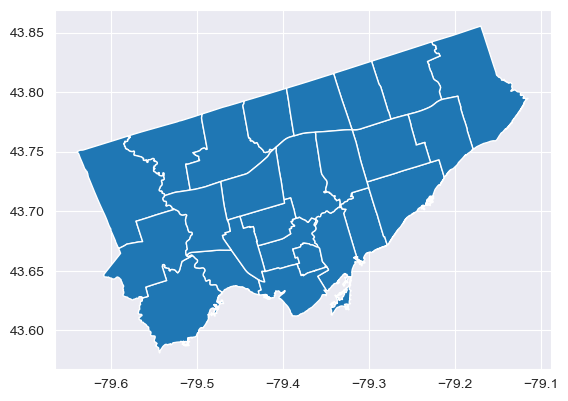

In [6]:
gdf.plot()

Loading data samples into dataframes and creating columns for the address

In [7]:
#lets read our sample dataset
transportation_sample = "transporation_sample.csv"
transportation_df = pd.read_csv(transportation_sample)

#handling the null values for postal codes
transportation_df['Postal'] = transportation_df['Postal'].replace(r'^\s*$', '###', regex=True)

#creating new column
transportation_df['Address'] = transportation_df['Street_Num'] + " " +transportation_df['Street_Name'] + " "+ transportation_df['Street_Type'] +" " + transportation_df['Street_Direction'] + " " + transportation_df["Postal"]

print(transportation_df.head())

      Permit_Num                     Permit_Type  \
0  13 115917 BLD  Building Additions/Alterations   
1  13 116906 BLD  Building Additions/Alterations   
2  14 250795 BLD  Building Additions/Alterations   
3  14 260878 BLD  Building Additions/Alterations   
4  15 131086 BLD  Building Additions/Alterations   

                         Structure_Type                  Work Street_Num  \
0  Transit Station,Subway, Bus Terminal  Interior Alterations          1   
1  Transit Station,Subway, Bus Terminal  Interior Alterations         33   
2  Transit Station,Subway, Bus Terminal  Interior Alterations         38   
3  Transit Station,Subway, Bus Terminal  Interior Alterations         22   
4  Transit Station,Subway, Bus Terminal  Interior Alterations         55   

  Street_Name Street_Type Street_Direction Postal      Geo_Id Ward_Grid  \
0    YORKDALE          RD                     M6A   4940063.0     N1502   
1       BLOOR          ST                E    M4W  13497814.0     S2708   
2    

In [8]:
real_estate_df = pd.read_csv('realestate_sample.csv')

#handling the null values for postal codes
real_estate_df['Postal'] = transportation_df['Postal'].replace(r'^\s*$', '###', regex=True)

#creating new column
real_estate_df['Address'] = real_estate_df['Street_Num'] + " " +real_estate_df['Street_Name'] + " "+ real_estate_df['Street_Type'] +" " + real_estate_df['Street_Direction'] + " " + real_estate_df['Postal']

print(real_estate_df.head())


      Permit_Num                     Permit_Type      Structure_Type  \
0  01 185413 BLD  Building Additions/Alterations      Parking Garage   
1  04 167768 BLD  Building Additions/Alterations  Apartment Building   
2  06 176865 BLD                      New Houses      SFD - Detached   
3  07 132494 BLD                      New Houses  Stacked Townhouses   
4  07 244088 BLD                      New Houses      SFD - Detached   

                   Work Street_Num    Street_Name Street_Type  \
0  Interior Alterations         20  THE QUEENSWAY               
1  Interior Alterations    600-604         ROGERS          RD   
2          New Building         12     THE BRIDLE        PATH   
3          New Building        651         WARDEN         AVE   
4          New Building        514          VESTA          DR   

  Street_Direction Postal      Geo_Id Ward_Grid Application_Date Issued_Date  \
0                     M6A   8855505.0     S1404       2001-10-12  2001-11-08   
1               

In [9]:
amenities_df = pd.read_csv('amenities_sample.csv')

#handling the null values for postal codes
amenities_df['Postal'] = amenities_df['Postal'].replace(r'^\s*$', '###', regex=True)

#creating new column
amenities_df['Address'] = amenities_df['Street_Num'] + " " +amenities_df['Street_Name'] + " "+ amenities_df['Street_Type'] +" " + amenities_df['Street_Direction'] +" " + amenities_df['Postal']

print(amenities_df.head())

      Permit_Num                      Permit_Type  \
0  00 330311 CMB  Non-Residential Building Permit   
1  02 151529 BLD   Building Additions/Alterations   
2  04 111348 BLD   Building Additions/Alterations   
3  04 198435 BLD   Building Additions/Alterations   
4  05 115473 BLD                     New Building   

                 Structure_Type                                      Work  \
0  Hair, Barber and Other Salon  Addition/Alteration to Existing Building   
1                        Museum                      Interior Alterations   
2        Performing Arts Centre                      Interior Alterations   
3                Fitness Centre                      Interior Alterations   
4                          Club                              New Building   

  Street_Num   Street_Name Street_Type Street_Direction Postal      Geo_Id  \
0       3360         YONGE          ST                     M4N   7793316.0   
1        100      GARRISON          RD                     M5V

In [10]:
demolition_df = pd.read_csv("DemolitionDimension_Sample.csv")

print(demolition_df.head())

   Demolition_Key       IBMS Address  \
0               1       75 Mutual St   
1               2   1996 Bathurst St   
2               3  125 Parliament St   
3               4       480 Yonge St   
4               5     30 Erskine Ave   

                 Address of Existing Rental Building       RH File Number  \
0                               75, 77, 83 MUTUAL ST  14 183555 STE 27 RH   
1                1996, 1998 and 2000 Bathurst Street  15 270570 STE 21 RH   
2          125 Parliament Street and 50 Power Street  13 181698 STE 28 RH   
3  3 Grosvenor Street (492-494 Yonge Street), 484...  14 267359 STE 27 RH   
4                                  30 Erskine Avenue  13 116882 NNY 25 RH   

   (Post 2018) Ward City Council Approval Date Link to Staff Report  \
0                27                 2017-01-31   Final Staff Report   
1                12                 2017-03-09   Final Staff Report   
2                13                 2017-05-24   Final Staff Report   
3           

In [11]:
social_dev_df = pd.read_csv('social_development_sample.csv')
social_dev_df['Postal'] = social_dev_df['Postal'].replace(r'^\s*$', '###', regex=True)
#creating new column
social_dev_df['Address'] = social_dev_df['Street_Num'] + " " +social_dev_df['Street_Name'] + " "+ social_dev_df['Street_Type'] +" " + social_dev_df['Street_Direction'] + " " + social_dev_df['Postal']


Turning Full Addresses into Coordinates using our geocoder

In [12]:
#coordinate extraction
from tqdm.notebook import tqdm  #progress bar
tqdm.pandas()
transportation_df[
    'Coordinates'] = transportation_df['Address'].progress_apply(lambda x: geocode(x))
print(transportation_df.head())

  0%|          | 0/379 [00:00<?, ?it/s]

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [13]:
tqdm.pandas()
amenities_df[
    'Coordinates'] = amenities_df['Address'].progress_apply(lambda x: geocode(x))
print(amenities_df.head())

  0%|          | 0/710 [00:00<?, ?it/s]

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [ ]:
tqdm.pandas()
real_estate_df[
    'Coordinates'] = real_estate_df['Address'].progress_apply(lambda x: geocode(x))
print(real_estate_df['Coordinates'])

In [ ]:
tqdm.pandas()
demolition_df[
    'Coordinates'] = demolition_df['Address'].progress_apply(lambda x: geocode(x))
print(real_estate_df['Coordinates'])

In [ ]:
from tqdm.notebook import tqdm  #progress bar
tqdm.pandas()
social_dev_df[
    'Coordinates'] = social_dev_df['Address'].progress_apply(lambda x: geocode(x))
print(social_dev_df.head())

MAPPING SECTION -- taking our points and linking them to a ward

In [ ]:
#getting our map ready. we need to project the initial GeoJSON onto the folium map
gdf_projected = gdf.to_crs(epsg=4326)
s_index = gdf_projected.sindex
centroid = gdf_projected.geometry.centroid

In [16]:
mean_latitude = centroid.y.mean()
mean_longitude = centroid.x.mean()

In [17]:
m = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=10)

In [18]:
#ward mapping function
def ward_mapper(point):
    ward_index = None
    ward_name = None

    if point is not None:
        possible_matches_index = list(s_index.intersection(point.bounds)) #list of possible wards
        found_match = False
        for idx in possible_matches_index: #iterate to find wards
            if gdf['geometry'][idx].contains(point):
                print("Point is contained within geometry at index:", idx)
                # Optionally, you can also print more information about the geometry
                print(gdf.iloc[idx]['AREA_NAME'])
                found_match = True
                ward_name = gdf.iloc[idx]['AREA_NAME']
                ward_index = idx

                break

        if not found_match:
            print(f"Point {point} is not contained in any ward.")
        latitude, longitude = point.y, point.x
        folium.Marker(location=(latitude, longitude), popup='Point').add_to(m)
    return ward_index,ward_name


In [ ]:
folium.GeoJson(gdf_projected.to_json()).add_to(m)

In [20]:
# Unpack the result into separate columns in the DataFrame
transportation_df['Ward_Index'], transportation_df['Ward'] = zip(*transportation_df['Coordinates'].apply(ward_mapper))
print(transportation_df.loc[:, ['Coordinates','Ward_Index', 'Ward']])

Point is contained within geometry at index: 17
Eglinton-Lawrence
Point is contained within geometry at index: 3
University-Rosedale
Point is contained within geometry at index: 5
Scarborough Southwest
Point is contained within geometry at index: 23
Toronto-Danforth
Point is contained within geometry at index: 24
Spadina-Fort York
Point is contained within geometry at index: 24
Spadina-Fort York
Point is contained within geometry at index: 12
Toronto-St. Paul's
Point is contained within geometry at index: 5
Scarborough Southwest
Point is contained within geometry at index: 24
Spadina-Fort York
Point is contained within geometry at index: 24
Spadina-Fort York
Point is contained within geometry at index: 24
Spadina-Fort York
Point is contained within geometry at index: 4
Beaches-East York
Point is contained within geometry at index: 24
Spadina-Fort York
Point is contained within geometry at index: 12
Toronto-St. Paul's
Point is contained within geometry at index: 12
Toronto-St. Paul's
Po

In [21]:
amenities_df['Ward_Index'], amenities_df['Ward'] = zip(*amenities_df['Coordinates'].apply(ward_mapper))
print(amenities_df.loc[:, ['Coordinates','Ward_Index', 'Ward']])

Point is contained within geometry at index: 17
Eglinton-Lawrence
Point is contained within geometry at index: 24
Spadina-Fort York
Point is contained within geometry at index: 13
Parkdale-High Park
Point is contained within geometry at index: 15
Etobicoke-Lakeshore
Point is contained within geometry at index: 24
Spadina-Fort York
Point is contained within geometry at index: 17
Eglinton-Lawrence
Point is contained within geometry at index: 13
Parkdale-High Park
Point is contained within geometry at index: 13
Parkdale-High Park
Point is contained within geometry at index: 13
Parkdale-High Park
Point is contained within geometry at index: 14
Etobicoke North
Point is contained within geometry at index: 0
Humber River-Black Creek
Point is contained within geometry at index: 15
Etobicoke-Lakeshore
Point is contained within geometry at index: 3
University-Rosedale
Point is contained within geometry at index: 12
Toronto-St. Paul's
Point is contained within geometry at index: 9
Scarborough Cen

In [22]:
real_estate_df['Ward_Index'], real_estate_df['Ward'] = zip(*real_estate_df['Coordinates'].apply(ward_mapper))
print(real_estate_df.loc[:, ['Coordinates','Ward_Index', 'Ward']])

KeyError: 'Coordinates'

In [ ]:
demolition_df['Ward_Index'], demolition_df['Ward'] = zip(*demolition_df['Coordinates'].apply(ward_mapper))
print(demolition_df.loc[:, ['Coordinates','Ward_Index', 'Ward']])

In [ ]:
social_dev_df['Ward_Index'], social_dev_df['Ward'] = zip(*social_dev_df['Coordinates'].apply(ward_mapper))

In [ ]:
social_dev_df.to_csv("Social_Development_Sample_Wards.csv",index=False)

In [23]:
m # to view the points on the map